# Riddler - _Can You Survive This Deadly Boardgame?_
_October 14, 2016_

In the [Riddler Classic](http://fivethirtyeight.com/features/can-you-survive-this-deadly-board-game/) we're asked:

>While traveling in the Kingdom of Arbitraria, you are accused of a heinous crime. Arbitraria decides who’s guilty or innocent not through a court system, but a board game. It’s played on a simple board: a track with sequential spaces numbered from 0 to 1,000. The zero space is marked “start,” and your token is placed on it. You are handed a fair six-sided die and three coins. You are allowed to place the coins on three different (nonzero) spaces. Once placed, the coins may not be moved.

>After placing the three coins, you roll the die and move your token forward the appropriate number of spaces. If, after moving the token, it lands on a space with a coin on it, you are freed. If not, you roll again and continue moving forward. If your token passes all three coins without landing on one, you are executed. On which three spaces should you place the coins to maximize your chances of survival?

## Analytic solution

I have no idea how to do this, so let's attempt the computational solution first, then see if it can be "checked" analytically.

## Computational solution

Let's run 10000 trials keeping track where the token lands for each trial.  We can then sum up along the trials axis yeilding a histogram for how often each position was landed on.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

trials = 10000
dat = np.empty((1000, trials))

for i in range(trials):
    count = 0
    while count < 1000:
        roll = np.random.randint(6)+1
        count += roll
        if count < 1000:
            dat[count-1, i] += 1

paleo_histo = np.sum(dat, axis = 1)

<Container object of 1000 artists>

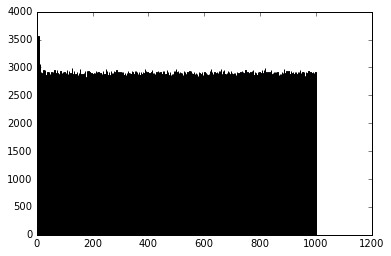

In [2]:
plt.bar(np.arange(1000)+1,paleo_histo)

It seems pretty clear that early on in the sequence is point of maximum probability so let's zoom in:

<Container object of 20 artists>

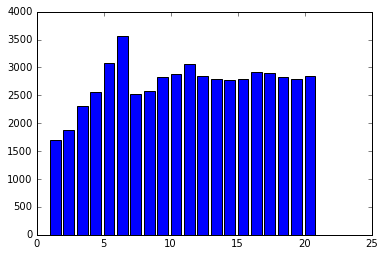

In [3]:
plt.bar(np.arange(20)+1,paleo_histo[0:20])

So it looks like the maximum probability is at 6.  We have to be carefull for the other two positions.  It looks like it could be 5 but the third position is unclear. What we need to bear in mind though is that some of these routes went "through" the 6 spot so we need to remove all trials that landed on 6:

<Container object of 1000 artists>

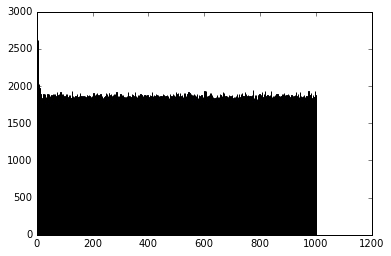

In [4]:
dat2 = dat[:,dat[np.argmax(paleo_histo)]==0]
histo2 = np.sum(dat2,axis=1)
plt.bar(np.arange(1000)+1,histo2)

Again it's pretty clear the maximum is near the beginning, so zooming in:

<Container object of 20 artists>

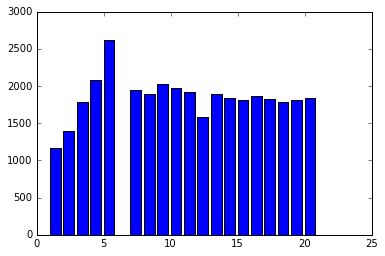

In [5]:
plt.bar(np.arange(20)+1,histo2[0:20])

Now it's clear that for trials that didn't go through 6, the next best spot is 5.  Again let's remove those trials and find the 3rd spot:

In [6]:
print(histo2[np.argmax(histo2)])
print(np.argmax(histo2))

2621.0
4


<Container object of 1000 artists>

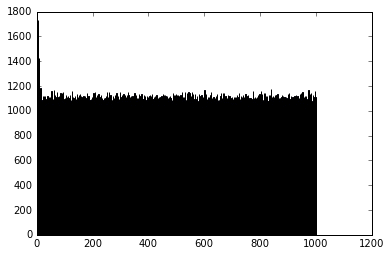

In [7]:
dat3 = dat2[:,dat2[np.argmax(histo2)]==0]
histo3 = np.sum(dat3,axis=1)
plt.bar(np.arange(1000)+1,histo3)

Again it's pretty clear the maximum is near the beginning, so zooming in:

<Container object of 20 artists>

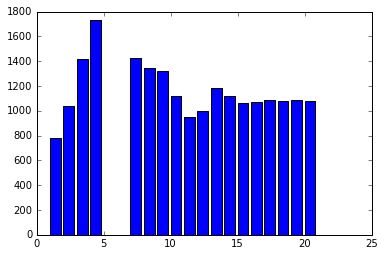

In [8]:
plt.bar(np.arange(20)+1,histo3[0:20])

In [9]:
print(np.argmax(histo3))
print(histo3[np.argmax(histo3)])

3
1732.0


So it's pretty clear it's 4.  The probability of survival then is:

In [10]:
print((max(paleo_histo)+max(histo2)+max(histo3))/trials)


0.7924


## Analytic Check of solution

So maybe it should have been clearer in the beginning that choosing numbers between 1 and 6 would be best strategy as you could get 1/2 chance on the first roll, with good chances of success on subsequent rolls for the non-winning first rolls. So it seems straight forward to check that the computed probability of 79.24% for a strategy of picking 4, 5, and 6 fo the location of the coins.

The most rolls possible and still win is 4, so we can write out the probability of avoiding execution as the sum of probabilities for doing so on the 1st through 4th rolls:

$$P_{success}\ =\ P_1 + P_2 + P_3 + P_4$$

On the first roll, you have a 0.5 chance of hitting your coins (P_1 = 0.5) and then a 1/6 chance of your token hitting each of 1, 2, or 3. So on your first roll you have a 50% chance of avoiding execution. Regardless of "losing" roll, you still have a 50% chance of success on the second roll: 1,2, or 3 after a 3; 2,3, or 4 after a 2; and 3,4, or 5 after a 1. Given a second roll, the probability of winning is 50%, so $P_2\ = 0.5 \times 0.5 = 0.25$

If we've made it to third roll, it's only by three routss: we rolled a 2 and then a 1 or we rolled a 1 and then 1 or 2.  Do so has a probability of $\frac{1}{6}\times\frac{1}{6}\ +\ \frac{1}{6}\times (\frac{1}{6}\ + \frac{1}{6}) = \frac{1}{12}$. Note: it's not simply $1 - P_1 - P_2 = 0.25$ as that includes "execution" rolls putting us past the 6 spot. From either the 2 or 3 spot, the probability of winning is again 50%, so $P_3\ = \frac{1}{2}\times \frac{1}{12} = \frac{1}{24}$.

To make it to a fourth roll, we'd have had roll three 1's (probability $=\frac{1}{6}^3$), and to survive this (final) roll, we have 50% chance, so $P_4 = \frac{1}{432}$, leading to:

$$P_{success}\ = \frac{1}{2} + \frac{1}{4} + \frac{1}{24} + \frac{1}{432} = 0.79398$$

Close enough?

## Addendum...

How'd I do?....